# [中選會立委](https://www.cec.gov.tw/pc/zh_TW/IDX/indexT.html)

### 導入套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # 中文輸出(台北黑體)
%matplotlib inline
import copy
import pickle
import requests # 讀取網頁資料
import bs4
from selenium import webdriver

In [2]:
headers = {'user-agent':'Mozilla/5.0 (X11; Linux x86_64)'}
def get_soup(url, headers=headers):
    r = requests.get(url, headers=headers)
    rt = r.text
    soup = bs4.BeautifulSoup(rt, "html.parser")
    
    return soup

In [3]:
url = 'https://www.cec.gov.tw/pc/zh_TW/IDX/indexT.html'
soup = get_soup(url)

### 發現選區是由JAVA Script 產生

In [4]:
soup.select('script')

[<script src="../js/ftiens4.js" type="text/javascript"></script>,
 <script src="../js/ua.js" type="text/javascript"></script>,
 <script src="../js/func.js" type="text/javascript"></script>,
 <script src="../js/treeT.js" type="text/javascript"></script>,
 <script>initializeDocument()</script>]

### 找到那份資料來觀察分析

In [5]:
url = 'https://www.cec.gov.tw/pc/zh_TW/js/treeT.js'
r = requests.get(url)
lst = []
for text in r.text.split(';'):
    if (len(text) < 50) and ('Area' in text) and ('][' in text):
        lst.append(text[text.find('Area'):])
        
lst

["AreaName[0][0]='臺北市'",
 "AreaID[0][0]='63000000000000000'",
 "AreaName[1][0]='新北市'",
 "AreaID[1][0]='65000000000000000'",
 "AreaName[2][0]='桃園市'",
 "AreaID[2][0]='68000000000000000'",
 "AreaName[3][0]='臺中市'",
 "AreaID[3][0]='66000000000000000'",
 "AreaName[4][0]='臺南市'",
 "AreaID[4][0]='67000000000000000'",
 "AreaName[5][0]='高雄市'",
 "AreaID[5][0]='64000000000000000'",
 "AreaName[6][0]='新竹縣'",
 "AreaID[6][0]='10004000000000000'",
 "AreaName[7][0]='苗栗縣'",
 "AreaID[7][0]='10005000000000000'",
 "AreaName[8][0]='彰化縣'",
 "AreaID[8][0]='10007000000000000'",
 "AreaName[9][0]='南投縣'",
 "AreaID[9][0]='10008000000000000'",
 "AreaName[10][0]='雲林縣'",
 "AreaID[10][0]='10009000000000000'",
 "AreaName[11][0]='嘉義縣'",
 "AreaID[11][0]='10010000000000000'",
 "AreaName[12][0]='屏東縣'",
 "AreaID[12][0]='10013000000000000'",
 "AreaName[13][0]='宜蘭縣'",
 "AreaID[13][0]='10002000000000000'",
 "AreaName[14][0]='花蓮縣'",
 "AreaID[14][0]='10015000000000000'",
 "AreaName[15][0]='臺東縣'",
 "AreaID[15][0]='10014000000000000

### 整理一下lst

In [6]:
for ind, text in enumerate(lst):
    if 'AreaID[i][j]' in text:
        break
lst = lst[:ind]

### 執行文本存下資料

In [7]:
AreaName = {}
AreaID = {}
for exe in lst:
    try:
        exec(exe) # 無法創字典 key 還沒使用
    except:
        exec(f'{exe[:exe.find("][")+1]} = dict()') #先創造 key
        exec(exe)

### 獲取所有網站連結

In [8]:
url_st = 'https://www.cec.gov.tw/pc/zh_TW/L4/n'

for ind1 in AreaID:
    for ind2 in AreaID[ind1]:
        a_name = AreaName[ind1][ind2]
        a_id = AreaID[ind1][ind2]
        a_url = f'{url_st}{a_id}.html'
        if not ind2:
            print(f'{a_name} :')
        else:
            print(f'  {a_name} : {a_url}')

臺北市 :
  松山區 : https://www.cec.gov.tw/pc/zh_TW/L4/n63000000100000000.html
  信義區 : https://www.cec.gov.tw/pc/zh_TW/L4/n63000000200000000.html
  大安區 : https://www.cec.gov.tw/pc/zh_TW/L4/n63000000300000000.html
  中山區 : https://www.cec.gov.tw/pc/zh_TW/L4/n63000000400000000.html
  中正區 : https://www.cec.gov.tw/pc/zh_TW/L4/n63000000500000000.html
  大同區 : https://www.cec.gov.tw/pc/zh_TW/L4/n63000000600000000.html
  萬華區 : https://www.cec.gov.tw/pc/zh_TW/L4/n63000000700000000.html
  文山區 : https://www.cec.gov.tw/pc/zh_TW/L4/n63000000800000000.html
  南港區 : https://www.cec.gov.tw/pc/zh_TW/L4/n63000000900000000.html
  內湖區 : https://www.cec.gov.tw/pc/zh_TW/L4/n63000001000000000.html
  士林區 : https://www.cec.gov.tw/pc/zh_TW/L4/n63000001100000000.html
  北投區 : https://www.cec.gov.tw/pc/zh_TW/L4/n63000001200000000.html
新北市 :
  板橋區 : https://www.cec.gov.tw/pc/zh_TW/L4/n65000000100000000.html
  三重區 : https://www.cec.gov.tw/pc/zh_TW/L4/n65000000200000000.html
  中和區 : https://www.cec.gov.tw/pc/zh_TW/L4/n650000

### 讀取單一區的票數 (1號得票數, 1號得票率, 2號得票數, 2號得票率.....  19號得票數, 19號得票率)

In [9]:
soup = get_soup('https://www.cec.gov.tw/pc/zh_TW/L4/n63000000100000000.html')
for ind, val in enumerate(soup.select('td.tdAlignRight')):
    print(ind, val.text)

0 54
1 0.0430
2 147
3 0.1170
4 4,947
5 3.9376
6 1,041
7 0.8286
8 2,648
9 2.1077
10 10,187
11 8.1085
12 3,284
13 2.6139
14 218
15 0.1735
16 45,629
17 36.3190
18 474
19 0.3773
20 63
21 0.0501
22 4,468
23 3.5564
24 122
25 0.0971
26 36,313
27 28.9038
28 15,352
29 12.2196
30 67
31 0.0533
32 29
33 0.0231
34 376
35 0.2993
36 215
37 0.1711


### 爬下所有票數

### 存檔案免得從爬

### 讀檔案

In [2]:
with open('party_vote.pkl', 'rb') as file:
    pk = file.read()
AreaName, Areavote = pickle.loads(pk)

### 切出要的資料

In [3]:
TW_vote = {}
for ind1 in AreaName:
    for ind2 in AreaName[ind1]:
        if not ind2: # 縣市 or 鄉鎮區
            TW_vote[AreaName[ind1][0] + AreaName[ind1][ind2]] = Areavote[ind1][ind2]
            
TW_vote = pd.DataFrame(TW_vote)
TW_vote.index = range(1, 20)

In [4]:
party_vote = TW_vote.iloc[[2, 4, 5, 8, 13, 14]]
party_vote = party_vote / party_vote.sum() * 100

In [5]:
party_name = np.array(['親民黨', '台灣基進', '時代力量', '國民黨', '民進黨', '民眾黨']) # 政黨
c_lst = np.array(['#ff6213', '#ab3e26', '#ffbf27', '#0008a7', '#009b1c', '#00dbdd']) # 色碼
party_vote.index = party_name

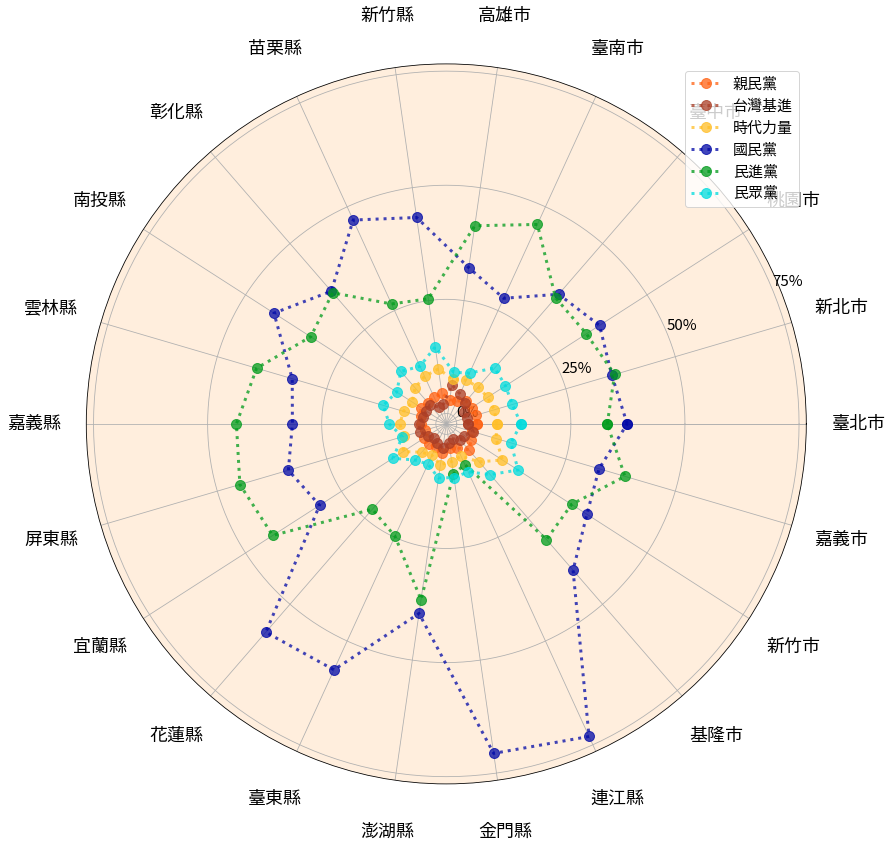

In [6]:
arr = party_vote.values
ar =  np.concatenate((arr, arr[:, 0:1]), axis=1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0, 0, 1, 1], projection='polar', facecolor='#ffeedd')

angle = np.linspace(0, 2*np.pi, ar.shape[1])
for i in range(6):
    ax.plot(angle, ar[i], 'o:', c=c_lst[i], ms=10, lw=3, alpha=0.75, label=party_name[i])

for i in range(ar.shape[1]-1):
    ax.text(angle[i], 88, party_vote.columns[i][3:], fontsize=18, 
            horizontalalignment='center', verticalalignment='center')
    
plt.xticks(np.linspace(0, 2*np.pi, ar.shape[1]), [])
plt.yticks(range(0, 76, 25), ['0%', '25%', '50%', '75%'], fontsize=15)
ax.grid(True)
plt.legend(loc=1, fontsize=15)

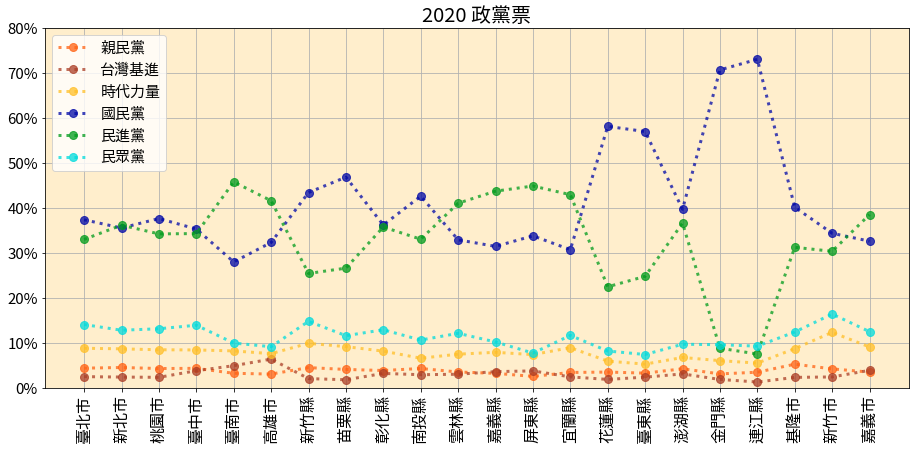

In [7]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(6):
    ax.plot(arr[i], 'o:', c=c_lst[i], ms=8, lw=3, alpha=0.75, label=party_name[i])

plt.xticks(range(22), party_vote.columns.str[3:], fontsize=16, horizontalalignment='center', rotation=90)
plt.yticks(range(0, 81, 10), [str(s)+'%' for s in range(0, 81, 10)], fontsize=15)
plt.ylim([0, 80])
plt.title('2020 政黨票', fontsize=20)
ax.grid(True)
plt.legend(loc=2, fontsize=15)


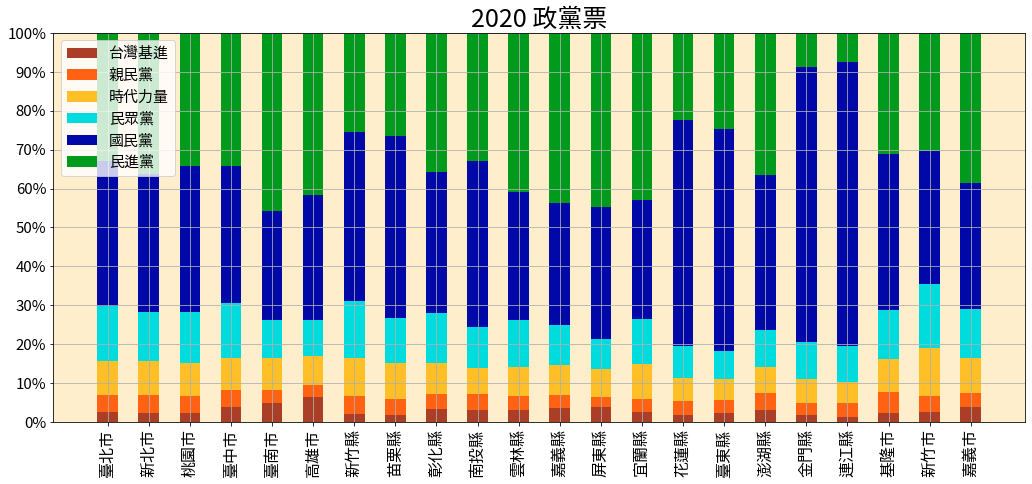

In [8]:
sort = [1, 0, 2, 5, 3, 4] # 重新排列政黨

fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9], facecolor='#ffeecc')

for i in range(6):
    ax.bar(np.arange(22), arr[sort][i], 0.5,  yerr=np.zeros(22), color=c_lst[sort][i],  bottom=arr[sort][0:i, :].sum(0), label=party_name[sort][i])
    
plt.xticks(range(22), party_vote.columns.str[3:], fontsize=16, horizontalalignment='center', rotation=90)
plt.yticks(range(0, 101, 10), [str(s)+'%' for s in range(0, 101, 10)], fontsize=15)
plt.ylim([0, 100])
plt.title('2020 政黨票', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=15)

## 取log

In [9]:
party_vote = TW_vote.iloc[[2, 4, 5, 8, 13, 14]]
party_vote.index = party_name
party_vote

,臺北市臺北市,新北市新北市,桃園市桃園市,臺中市臺中市,臺南市臺南市,高雄市高雄市,新竹縣新竹縣,苗栗縣苗栗縣,彰化縣彰化縣,南投縣南投縣,...,屏東縣屏東縣,宜蘭縣宜蘭縣,花蓮縣花蓮縣,臺東縣臺東縣,澎湖縣澎湖縣,金門縣金門縣,連江縣連江縣,基隆市基隆市,新竹市新竹市,嘉義市嘉義市
親民黨,65483,103267,51776,68244,34272,49787,13276,12428,27099,11809,...,11939,8659,5972,3445,1960,1352,196,10935,10216,5195
台灣基進,37166,54603,28105,59968,52177,104100,6053,5443,22519,8008,...,17677,6153,3185,2500,1431,811,73,4822,5866,5779
時代力量,131906,198086,102127,132765,87123,123820,29271,27854,57452,18096,...,34719,22659,10114,5565,3126,2638,311,18149,29935,13514
國民黨,560522,812468,454561,556865,297216,527139,128459,142548,255067,117230,...,158950,78014,99197,60213,18412,30885,4134,83668,83412,48538
民進黨,494909,826977,413343,540803,486263,678564,75212,80977,251888,90878,...,211082,109048,38330,26189,16991,3846,425,65108,73697,57335
民眾黨,210977,292750,158534,219492,105740,148989,43726,35265,90939,29216,...,36352,29565,13958,7822,4494,4188,524,25853,39822,18585


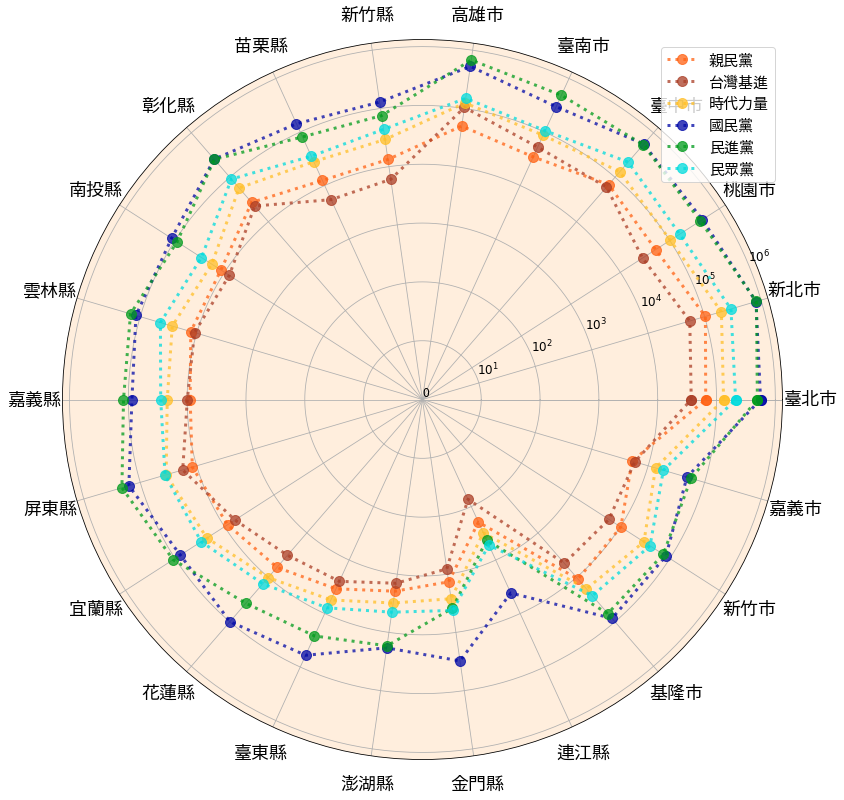

In [10]:
arr = np.log10(party_vote.values)
ar =  np.concatenate((arr, arr[:, 0:1]), axis=1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0, 0, 1, 1], projection='polar', facecolor='#ffeedd')

angle = np.linspace(0, 2*np.pi, ar.shape[1])
for i in range(6):
    ax.plot(angle, ar[i], 'o:', c=c_lst[i], ms=10, lw=3, alpha=0.75, label=party_name[i])

for i in range(ar.shape[1]-1):
    ax.text(angle[i], 6.6, party_vote.columns[i][3:], fontsize=18, 
            horizontalalignment='center', verticalalignment='center')
    
plt.xticks(np.linspace(0, 2*np.pi, ar.shape[1]), [])
plt.yticks(range(7), [0, r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$'], fontsize=12)

ax.grid(True)
plt.legend(loc=1, fontsize=15)

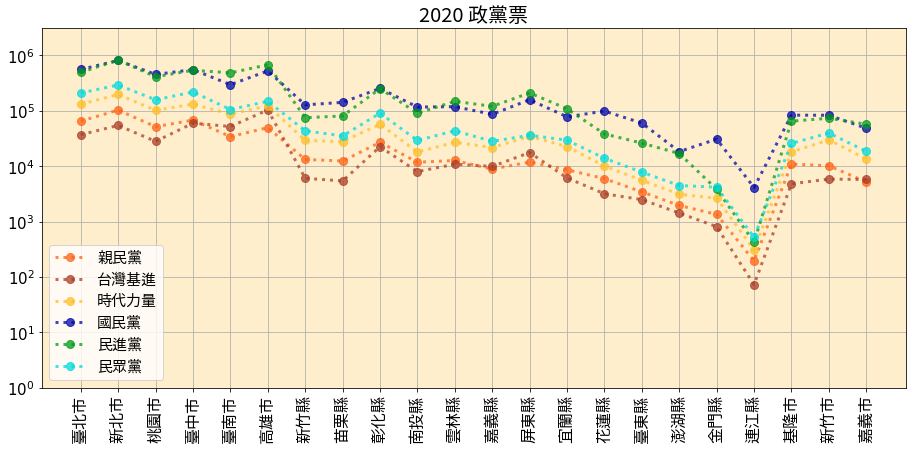

In [11]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(6):
    ax.plot(arr[i], 'o:', c=c_lst[i], ms=8, lw=3, alpha=0.75, label=party_name[i])
    
plt.xticks(range(22), party_vote.columns.str[3:], fontsize=16, horizontalalignment='center', rotation=90)
plt.yticks(range(7), [f'$10^{s}$' for s in range(7)], fontsize=15)
plt.ylim([0, 6.5])
plt.title('2020 政黨票', fontsize=20)
ax.grid(True)
plt.legend(loc=3, fontsize=15)